In [1]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [2]:
train=pd.read_csv('/home/britto/ProjectData/traindat.csv')
alldat=pd.read_csv('/home/britto/ProjectData/cleanedall.csv')

In [4]:
alldat.head(10)

,Tweet,Sentiment
0,there’re only few in congress who are fightin...,8.0
1,in a nation that allows big corporations and b...,8.0
2,congress .. since you all like have congressio...,8.0
3,in a nation that allows big corporations and b...,8.0
4,the 3 chambers of congress? way to go ny dist...,8.0
5,congress .. since you all like have congressio...,8.0
6,congress .. since you all like have congressio...,8.0
7,immigration fraud ilhanomarmarriedatfirstsight...,8.0
8,"news alert. just announced now that, as a pea...",8.0
9,"letpeaceprevail is trying to make peace, stop ...",8.0


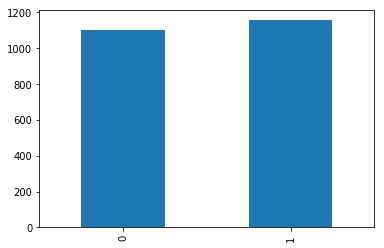

In [5]:
train['Sentiment'].value_counts().sort_index().plot.bar()

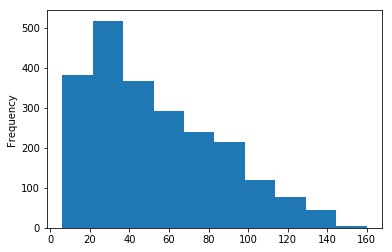

In [9]:
train['Tweet'].str.len().plot.hist()

In [3]:
train['Tweet'] = train['Tweet'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
alldat['Tweet'] = alldat['Tweet'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

In [4]:
for i in range(0,len(alldat['Tweet'])):
    if type(alldat['Tweet'][i]) is float:
        print(i)


In [7]:
train['Tweet'].values

array(['an inspiration in all aspects: fashion', 'fitness',
       'beauty and personality. :kisses thefashionicon', ...,
       'same unhappy', 'hi instant message your friend  friend lang',
       'hindi close friend unhappy'], dtype=object)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus=train['Tweet']
vectorizer=TfidfVectorizer()
Y = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(Y.shape)

['00', '00am', '01', '04', '07', '08', '0xx', '10', '100', '1000', '100k', '100m', '101', '10am', '10th', '10usd', '11', '12', '12h', '13', '1372', '13rw', '14', '140', '15', '150', '157', '15pm', '16', '16th', '17', '1700s', '18', '19', '1972', '1gb', '1k', '1st', '20', '2000', '2000th', '2009', '2010', '2013', '2017', '20km', '20yrs', '22', '23rd', '24', '25', '25x25', '26th', '27', '27m', '27t', '28', '29', '2hrs', '2k', '2nd', '2ne1', '30', '32', '36', '3hrs', '3i', '3lans', '3m', '3rd', '40', '401', '40k', '40tlbeer', '420', '42nd', '45', '450', '45am', '47', '48', '4c', '4pmstory', '50', '515', '523', '5tl', '64rt', '70k', '70rts', '71', '75', '77', '7pm', '80', '89', '8th', '90', '900', '91', '99', '9am', '_all', 'a7a', 'a7atein', 'aa', 'aah', 'aam', 'aando', 'aaree', 'abbeydale', 'abbreviation', 'abc', 'abeg', 'abhishek', 'able', 'abort', 'aborting', 'about', 'abroad', 'absolutely', 'absorbed', 'abundance', 'abuse', 'abut', 'ac', 'acc', 'accent', 'accepted', 'access', 'accessin

In [29]:
Y=tokenizer.texts_to_sequences(train['Tweet'].values)
Y

[[62, 94, 63, 337, 250, 1835, 58, 4089],
 [51, 30, 184, 74, 1, 2459, 194],
 [366, 871, 3, 588, 18, 5, 1000, 194],
 [441, 18, 194],
 [351, 297, 25, 7, 1131, 194],
 [26, 9, 1, 346, 2, 57, 194],
 [382, 122, 12, 85],
 [76, 86, 191, 1, 2186, 5, 250],
 [26, 529, 209, 205, 333, 14, 12, 2501, 101, 73, 10, 769, 194],
 [2574, 2, 194],
 [97, 15, 18, 3176, 122, 250],
 [331, 60, 86, 1223, 442, 263],
 [54, 17, 39, 31, 2611, 2526, 1767],
 [17, 531, 18, 104, 2789, 250, 1164, 1, 8, 342, 1699],
 [16, 1953, 40, 7, 3879, 250],
 [441, 18, 194],
 [236, 94, 424, 293],
 [612],
 [250, 250, 467, 25],
 [1413, 1, 250],
 [62, 39, 3401, 5, 1, 151, 992, 250],
 [219, 3, 388, 517, 10, 4227, 73, 54, 351, 29, 369, 27, 3, 101, 3, 399],
 [547, 348, 5, 1792, 250],
 [242, 250],
 [223,
  19,
  17,
  164,
  17,
  94,
  191,
  69,
  3878,
  54,
  17,
  4530,
  18,
  176,
  16,
  3769,
  15,
  390,
  8,
  15,
  39],
 [785, 250],
 [274],
 [481, 328, 194],
 [31, 7, 249, 814, 194],
 [97, 13, 18, 219, 3, 3176, 250],
 [10, 731, 250]

In [5]:
tokenizer = Tokenizer(num_words=5500, split=" ")
tokenizer.fit_on_texts(alldat['Tweet'].values)

X = tokenizer.texts_to_sequences(train['Tweet'].values)
X = pad_sequences(X) # padding our text vector so they all have the same length
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,   46,    5,   38, 2650],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    8, 5289, 4670, 5138],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 2551, 1170, 2067, 1169, 1113, 1916,
         236, 1404,  101, 3659,  486, 4004, 1891],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0, 2096,   20,    1,    2,
          35,   98,    8, 2263, 2626,    1,  249]], dtyp

In [6]:
model = Sequential()
model.add(Embedding(5500, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 29, 256)           1408000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 29, 256)           525312    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 2,459,138
Trainable params: 2,459,138
Non-trainable params: 0
_________________________________________________________________


In [8]:
train=train.sample(frac=1)

In [9]:
y = pd.get_dummies(train['Sentiment']).values
[print(train['Sentiment'][i], y[i]) for i in range(0,5)]

1 [0 1]
1 [1 0]
1 [0 1]
1 [1 0]
1 [1 0]


[None, None, None, None, None]

In [28]:
train.head(10)

,Tweet,Sentiment
1597,post-show blues are hitting hard. unhappy,0
1250,cant believe he will be year for next year unh...,0
1106,woot smile,1
286,one by one allah ease my problem . lot of than...,1
771,i think im going to check out even though i he...,1
1635,muz u more,0
1938,one year ago today unhappy,0
549,no pressure happy,1
767,im getting one too smile smile smile smile,1
2130,i face swapped a cat with a dog and its really...,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
batch_size = 32
epochs = 12

model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=epochs, batch_size=batch_size, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 1802 samples, validate on 451 samples
Epoch 1/12
 - 11s - loss: 0.6937 - acc: 0.5366 - val_loss: 0.6947 - val_acc: 0.4789
Epoch 2/12
 - 8s - loss: 0.6870 - acc: 0.5455 - val_loss: 0.7055 - val_acc: 0.4634
Epoch 3/12
 - 9s - loss: 0.6417 - acc: 0.6393 - val_loss: 0.7254 - val_acc: 0.5122
Epoch 4/12
 - 8s - loss: 0.5604 - acc: 0.7087 - val_loss: 0.8140 - val_acc: 0.5078
Epoch 5/12
 - 8s - loss: 0.4991 - acc: 0.7481 - val_loss: 0.9181 - val_acc: 0.4812
Epoch 6/12
 - 8s - loss: 0.4490 - acc: 0.7858 - val_loss: 0.9320 - val_acc: 0.4856
Epoch 7/12
 - 8s - loss: 0.4052 - acc: 0.8074 - val_loss: 0.9155 - val_acc: 0.5033
Epoch 8/12
 - 8s - loss: 0.3721 - acc: 0.8063 - val_loss: 0.9601 - val_acc: 0.4900
Epoch 9/12
 - 8s - loss: 0.3562 - acc: 0.8307 - val_loss: 1.1708 - val_acc: 0.4945
Epoch 10/12
 - 8s - loss: 0.3197 - acc: 0.8407 - val_loss: 1.2707 - val_acc: 0.5144
Epoch 11/12
 - 9s - loss: 0.3221 - acc: 0.8424 - val_loss: 1.1252 - val_a

In [82]:
y_pred=model.predict(X_test)

In [83]:
y_pred

array([[2.39304714e-02, 9.76069510e-01],
       [7.14068830e-01, 2.85931110e-01],
       [9.77636814e-01, 2.23631114e-02],
       [1.10818915e-01, 8.89181077e-01],
       [6.69908345e-01, 3.30091715e-01],
       [6.13411129e-01, 3.86588931e-01],
       [8.69875789e-01, 1.30124182e-01],
       [4.16227400e-01, 5.83772600e-01],
       [4.37512845e-01, 5.62487125e-01],
       [6.09956622e-01, 3.90043348e-01],
       [5.76235175e-01, 4.23764795e-01],
       [9.85906243e-01, 1.40937418e-02],
       [8.69572833e-02, 9.13042665e-01],
       [9.96186793e-01, 3.81325511e-03],
       [6.13132536e-01, 3.86867434e-01],
       [8.27525020e-01, 1.72475010e-01],
       [9.14879024e-01, 8.51209909e-02],
       [6.41314387e-01, 3.58685613e-01],
       [3.19757522e-03, 9.96802449e-01],
       [2.61836648e-02, 9.73816335e-01],
       [9.83542323e-01, 1.64576825e-02],
       [1.35905594e-02, 9.86409426e-01],
       [5.76235175e-01, 4.23764795e-01],
       [4.97903913e-01, 5.02096117e-01],
       [9.169852

In [73]:
X_test.shape

(451, 28)

In [74]:
y_test.shape

(451, 2)

In [20]:
model.evaluate(X_test,y_test)

451/451 [==============================] - 0s 863us/step


[1.1378342320279378, 0.5077605322168566]